# 07. Visualization

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from scipy import stats, integrate
import seaborn as sns

### 1\. Kernel Density Estimate (40 min)

Produce a KDE for a given distribution (by hand, not using seaborn!):

* Fill a numpy array, x,  of len(N) (with N=O(100)) with a variable normally distributed, with a given mean and a standard deviation

In [37]:
N = 100
mean = 0
std = 1

x = np.random.normal(loc = mean, scale= std, size=N)

* Fill an histogram in pyplot taking properly care about the aesthetic
   * use a meaningful number of bins
   * set a proper y axis label
   * set proper value of y axis major ticks labels (e.g. you want to display only integer labels)
   * display the histograms as data points with errors (the error being the poisson uncertainty)

* for every element of x, create a gaussian with the mean corresponding the element value and std as a parameter that can be tuned. The std default value should be: $$ 1.06 * x.std() * x.size ^{-\frac{1}{5.}}$$ you can use the scipy function `stats.norm()` for that.
* In a separate plot (to be placed beside the original histogram), plot all the gaussian functions so obtained

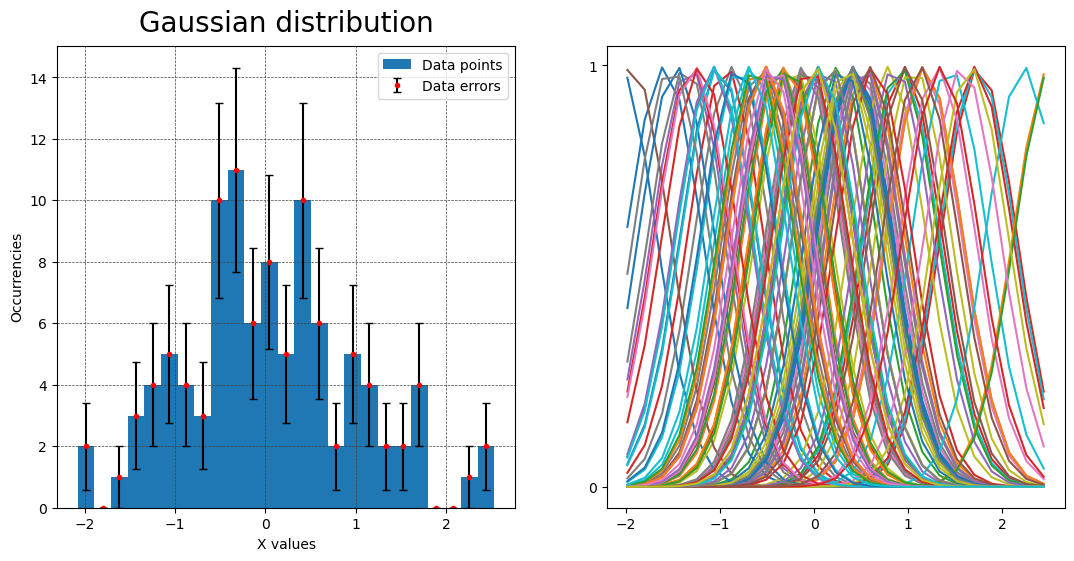

In [38]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(13, 6))

ax1.grid(linestyle="--", linewidth=0.5, color='.25', zorder=-10)

ax1.set_title("Gaussian distribution", fontsize=20, verticalalignment='bottom')
ax1.set_xlabel("X values")
ax1.set_ylabel("Occurrencies")

hist, bins, _ = ax1.hist(x, bins=25, label='Data points')
bin_centers = (bins[:-1] + bins[1:])/2
bin_width = bins[1] - bins[0]

plt.xticks(np.arange(int(min(x)), int(max(x)+1), 1))
plt.yticks(np.arange(0, int(max(hist) + 1), 1))

errors = np.sqrt(hist)
ax1.errorbar(bin_centers, hist, yerr=errors, fmt='.', color='red', ecolor='black', capsize=3, label='Data errors')

ax1.legend()

###############################################################################################

default_std = 1.06 * x.std() * (x.size ** (-1/5))
gaussians = []

for value in x:
    gaussian = stats.norm.pdf(bin_centers, loc=value, scale=default_std)
    gaussians.append(gaussian)

###############################################################################################

for gaussian in gaussians:
    ax2.plot(bin_centers, gaussian)
    
plt.show()

* Sum (with np.sum()) all the gaussian functions and normalize the result such that the integral matches the integral of the original histogram. For that you could use the `scipy.integrate.trapz()` method

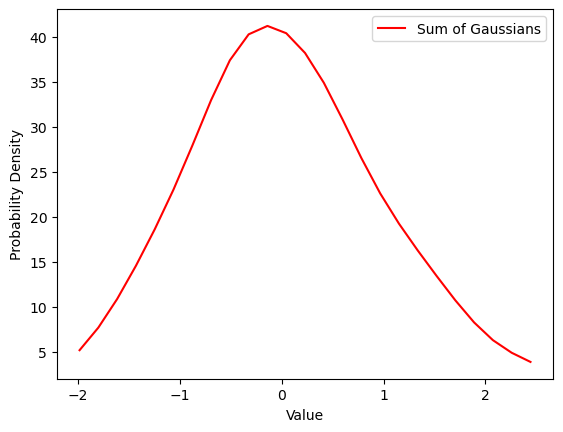

In [39]:
sum_of_gaussians = sum(gaussian for gaussian in gaussians)

integral_hist = integrate.trapz(hist)
integral_gaussians = integrate.trapz(sum_of_gaussians, bin_centers)
sum_of_gaussians /= (integral_gaussians / integral_hist)

plt.plot(bin_centers, sum_of_gaussians, label='Sum of Gaussians', color='red')
plt.xlabel('Value')
plt.ylabel('Probability Density')
plt.legend()

plt.show()

### 2\. Color-coded scatter plot (10 min)

Produce a scatter plot out of a dataset with two categories

* Write a function that generate a 2D datasets of 2 categories. Each category should distribute as a 2D gaussian with a given mean and std (clearly it is better to have different values means..)
* Display the dataset in a scatter plot marking the two categories with different marker colors.

An example is given below

You can try to make the procedure more general by allowing a given number $n\ge 2$ of categories

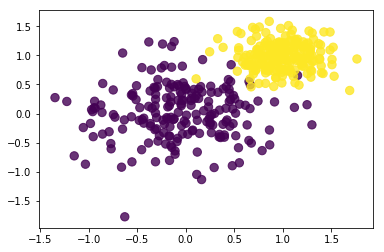

In [40]:
from IPython.display import Image
Image('two_categories_scatter_plot.png')

/tmp/ipykernel_3410/2005047656.py:4: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  gaussian = np.random.multivariate_normal(mean= loc[i], cov= cov_mat[i], size=N)


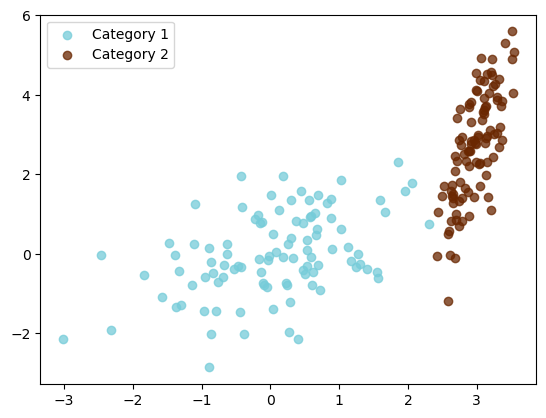

In [125]:
def dataset_generator(loc = [[]], cov_mat = [[]], N = int):
    gaussians = []
    for i in range(len(loc)):
        gaussian = np.random.multivariate_normal(mean= loc[i], cov= cov_mat[i], size=N)
        gaussians.append(gaussian)
    
    return gaussians

mean1 = [0, 0]
mean2 = [3, 3]

cov_mat1 = [[1, 0.5],
            [0.5, 1]]
cov_mat2 = [[0, -0.25],
            [0.25, 2]]

dataset = dataset_generator(loc=[mean1, mean2], cov_mat=[cov_mat1, cov_mat2], N=100)

for i, element in enumerate(dataset):
    color = np.random.rand(3,)
    plt.scatter(element[:, 0], element[:, 1], alpha=0.75, c = [color], label=f'Category {i+1}')
    
plt.legend()

### 3\. Profile plot (30 min)

Produce a profile plot from a scatter plot.
* Download the following dataset and load it as a pandas dataframe:
```bash
wget https://www.dropbox.com/s/hgnvyj9abatk8g6/residuals_261.npy
```
Note that you should use the `np.load()` function to load the file as a numpy array, call the `.item()` method, and then pass it to the `pd.DataFrame()` constructor.
* Inspect the dataset, you'll find two variables (features)

In [5]:
dataset = pd.DataFrame(np.load('./residuals_261.npy', allow_pickle=True).item())
dataset

,residuals,distances
0,1.100000,16.0
1,-1.950000,6.3
2,-7.200000,3.4
3,-4.150000,8.4
4,-6.590000,1.7
...,...,...
11126,-0.760000,14.4
11127,0.380000,7.5
11128,0.083333,1.7
11129,0.166667,19.1


* Clean the sample by selecting the entries (rows) with the variable "residual" in absolute value smaller than 2


In [7]:
dataset = dataset[abs(dataset['residuals']) < 2]
dataset

,residuals,distances
0,1.100000,16.0
1,-1.950000,6.3
8,-0.042857,3.3
9,0.128571,5.3
10,0.085714,15.0
...,...,...
11126,-0.760000,14.4
11127,0.380000,7.5
11128,0.083333,1.7
11129,0.166667,19.1


* Perform a linear regression of "residuals" versus "distances" using `scipy.stats.linregress()`

In [8]:
lin_reg = stats.linregress(y= dataset['residuals'], x= dataset['distances'])
lin_reg

LinregressResult(slope=0.003259770122030576, intercept=-0.15432816763069465, rvalue=0.04340351052255905, pvalue=8.71703718357661e-06, stderr=0.0007327014008445781, intercept_stderr=0.008458951961471829)

* plot a seaborn jointplot of  "residuals" versus "distances", having seaborn performing a linear regression. The result of the regression should be displayed on the plot
* Fill 3 numpy arrays
  * x, serving as an array of bin centers for the "distance" variable. It should range from 0 to 20 with reasonable number of steps (bins)
  * y, the mean values of the "residuals", estimated in slices (bins) of "distance"
  * erry, the standard deviation of the  of the "residuals", estimated in slices (bins) of "distance"
* Plot the profile plot on top of the scatter plot

/home/kallo27/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/kallo27/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


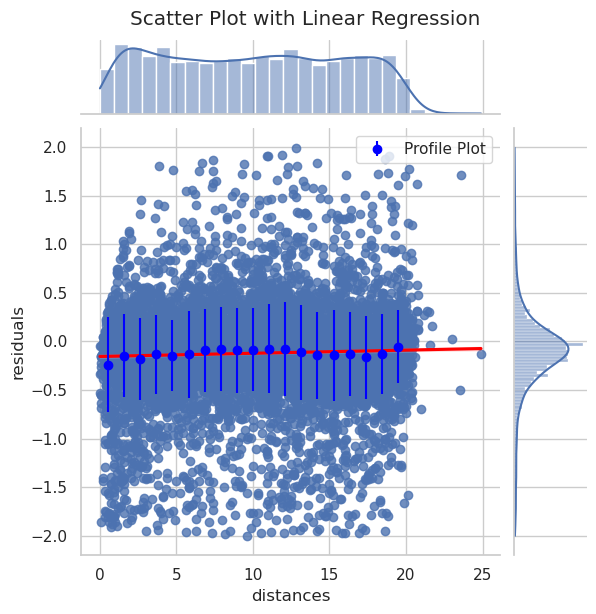

In [20]:
sns.set(style="whitegrid")

scatter_plot = sns.jointplot(x='distances', y='residuals', data=dataset, kind='reg', line_kws={'color': 'red'})
scatter_plot.fig.suptitle('Scatter Plot with Linear Regression', y=1.02)

bins = np.linspace(0, 20, num=20)
x = (bins[:-1] + bins[1:]) / 2

y, _, _ = stats.binned_statistic(dataset['distances'], dataset['residuals'], statistic='mean', bins=bins)
erry, _, _ = stats.binned_statistic(dataset['distances'], dataset['residuals'], statistic='std', bins=bins)

plt.errorbar(x, y, yerr=erry, fmt='o', color='blue', label='Profile Plot')
plt.legend()